In [76]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['xtick.labelsize'] =20
plt.rcParams['ytick.labelsize'] = 20

In [3]:
''' reading dataset '''
df = pd.read_csv('candy_production.csv')

In [4]:
''' dispalying first 5 rows '''
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [5]:
''' dispalying last 5 rows '''
df.tail()

,observation_date,IPG3113N
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861
547,2017-08-01,114.0613


In [80]:
''' making observation_date as index of df '''
df = df.rename(columns={'observation_date': 'date', 'IPG3113N': 'production'})
df.index = pd.DatetimeIndex(data=df.date)
df.drop(columns=['date'], inplace=True)

In [7]:
df = df.rename(columns={'observation_date':'data','IPG3113N':'production'})

In [10]:
df.index = pd.DatetimeIndex(data=df.data)

In [13]:
df.drop(columns=['data'],inplace=True)

In [14]:
df.head()

,production
data,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


In [16]:
df.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01'],
              dtype='datetime64[ns]', name='data', length=548, freq=None)

In [17]:
''' checking null values '''
df.isnull().sum()

production    0
dtype: int64

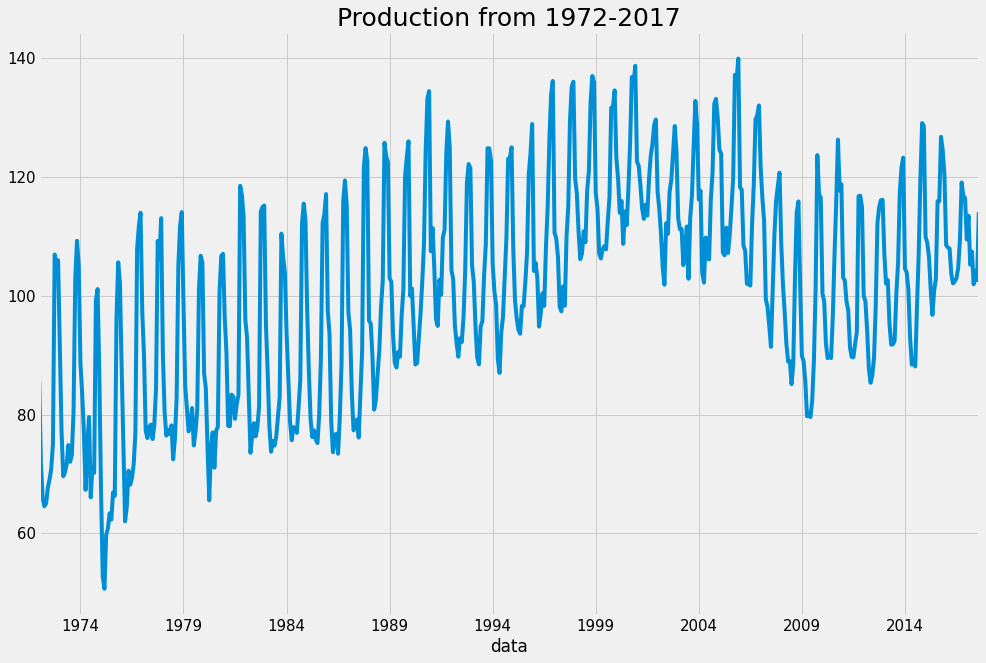

In [19]:
''' checking seasonality of data  '''
df.production.plot(figsize=(15, 10), fontsize=15)
plt.title('Production from 1972-2017', fontsize=25)
plt.show()

In [22]:
# boxcox(df.production)

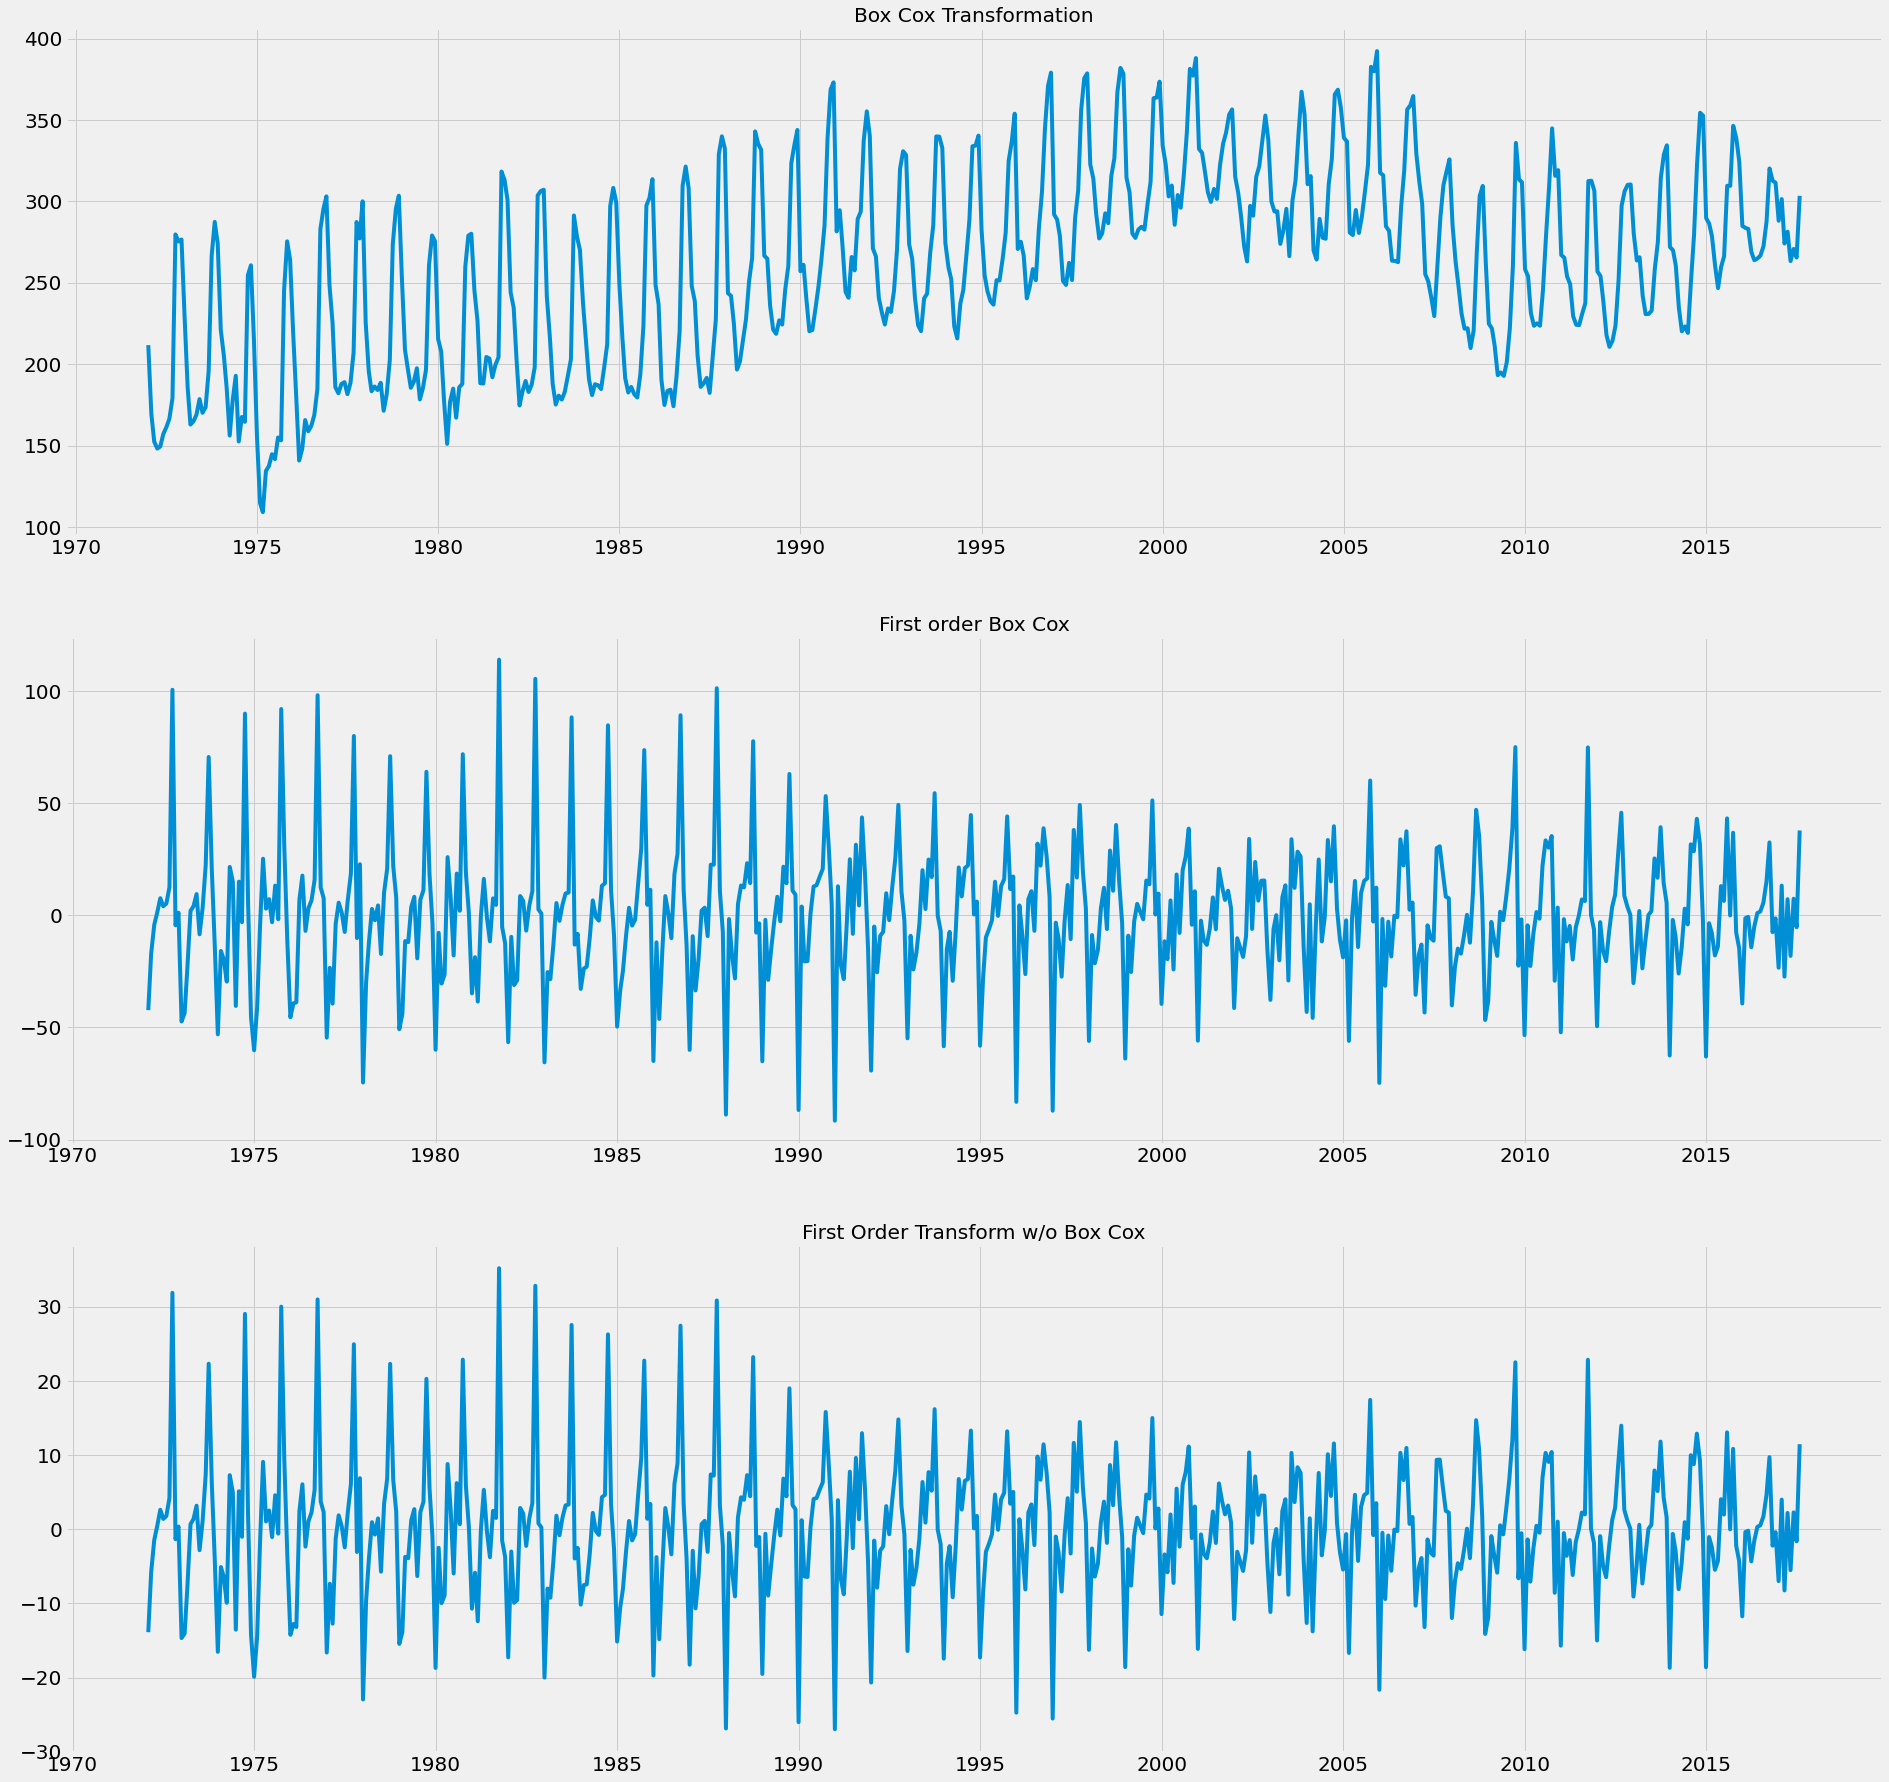

In [24]:
# ''' boxcox transformation '''

# df['bc_prod'], lamb = boxcox(df.production)
# df['df1_prod'] = df['bc_prod'].diff()
# df['df_prod'] = df.production.diff()
# fig = plt.figure(figsize=(20,40))

# bc = plt.subplot(411)
# bc.plot(df.bc_prod)
# bc.title.set_text('Box-Cox Transform')

# df1 = plt.subplot(412)
# df1.plot(df.df1_prod)
# df1.title.set_text('First-Order Box-Cox')

# df2 = plt.subplot(413)
# df2.plot(df.df_prod)
# df2.title.set_text('First-Order Transform w/o Box-Cox')

# df.bc_prod.dropna(inplace=True)
# df.df1_prod.dropna(inplace=True)
# df.df_prod.dropna(inplace=True)

# print(f'Lambda Value {lamb}')

df['bc_prod'],lamd = boxcox(df.production)
df['df1_prod'] = df['bc_prod'].diff()
df['df_prod'] = df.production.diff()

fig=plt.figure(figsize=(29,40))

bc = plt.subplot(411)
bc.plot(df.bc_prod)
bc.title.set_text("Box Cox Transformation")

df1=plt.subplot(412)
df1.plot(df.df1_prod)
df1.title.set_text("First order Box Cox")

df2 = plt.subplot(413)
df2.plot(df.df_prod)
df2.title.set_text("First Order Transform w/o Box Cox")

df.bc_prod.dropna(inplace=True)
df.df1_prod.dropna(inplace=True)
df.df_prod.dropna(inplace=True)

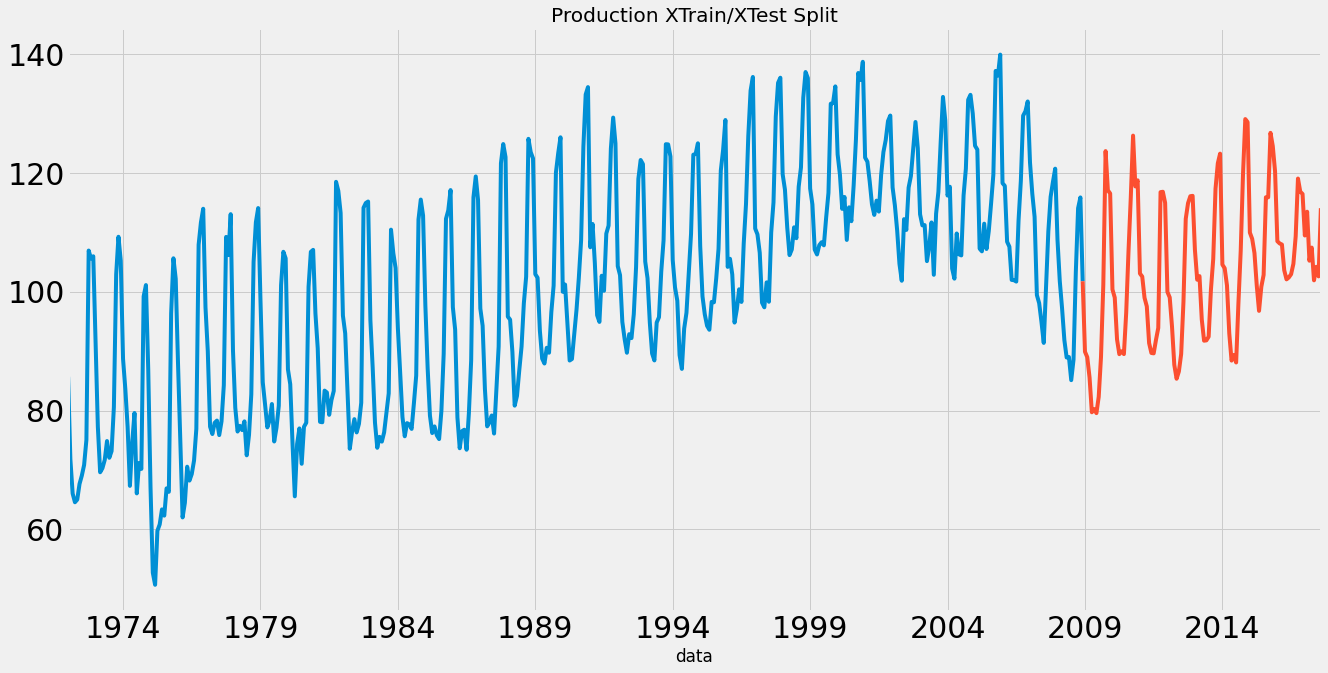

In [26]:
# ''' parameter estimation '''

# dt = '2008-12-01'
# X_train = df['production'].loc[:dt]
# X_test = df['production'].loc[dt:]
# X_train.plot(figsize=(20, 10), fontsize=20)
# plt.title('Production X_Train/X_Test Split', fontsize=30)
# X_test.plot()
# plt.show()

dt = '2008-12-01'
X_train = df['production'].loc[:dt]
X_test = df['production'].loc[dt:]
X_train.plot(figsize=(20,10),fontsize=30)
plt.title("Production XTrain/XTest Split")
X_test.plot()
plt.show()

In [37]:
# ''' SARIMAX model '''
# model = model = SARIMAX(X_train, freq='MS', order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))

# ''' fit on data '''
# model_fit = model.fit(disp=False) 


# SARIMAX model
model = SARIMAX(X_train,freq="MS",order=(1,1,1),seasonal_order = (1,0,0,12))
model_fit = model.fit(disp = False)

In [42]:
model_fit.forecast()[0]

94.84522261385202

Mean Squared Error: 188.41381035256853
----------------------------------------------------------------------------------------------------

Root Mean Squared Error: 13.72639101703607
----------------------------------------------------------------------------------------------------

Mean Absolute Error: 11.377647333572952
----------------------------------------------------------------------------------------------------



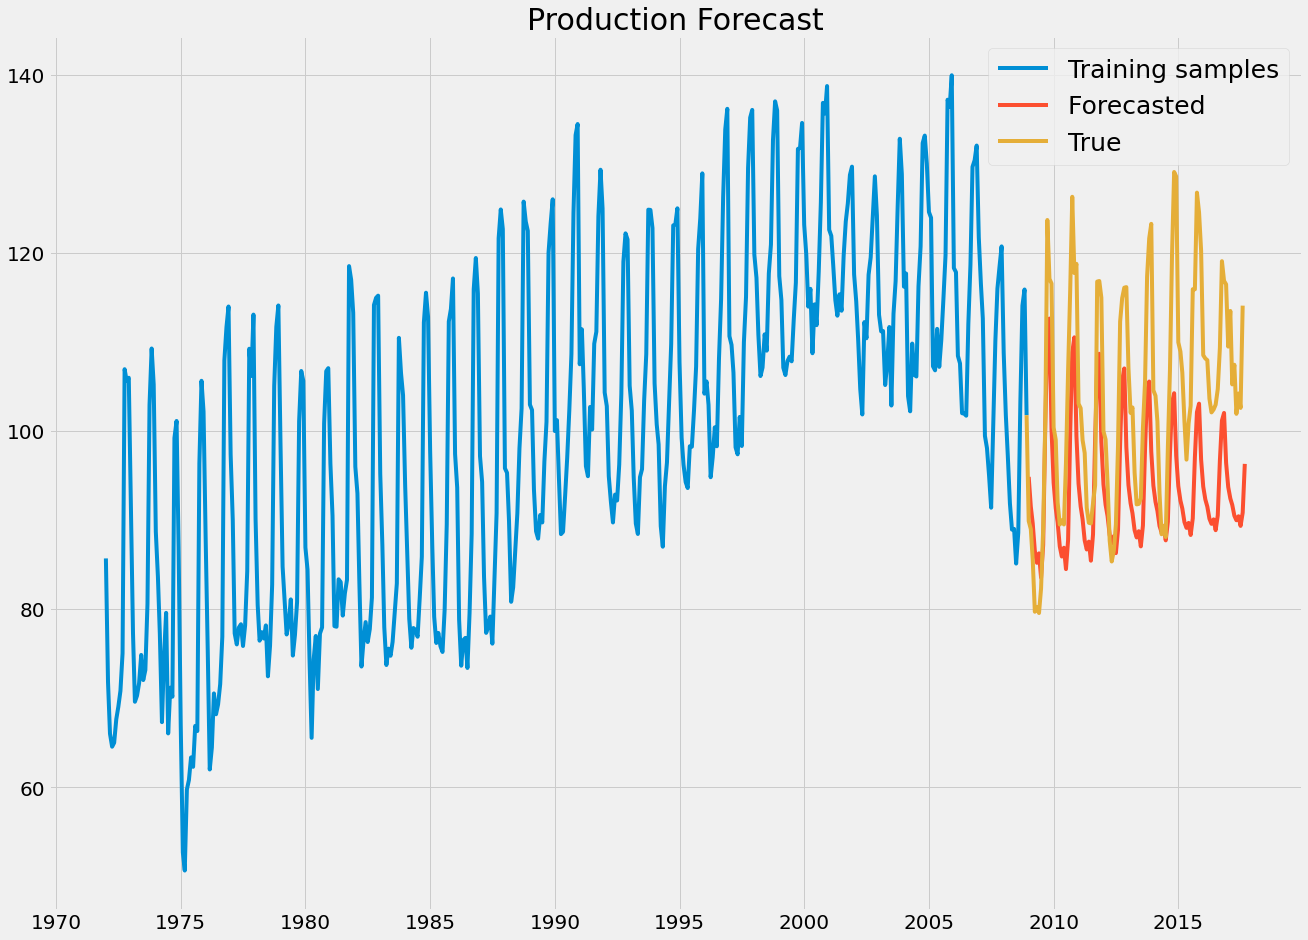

In [38]:
# ''' Model Measurements '''

# forecast_len = len(X_test)
forecast_len = len(X_test)
# ffit = model_fit.forecast(forecast_len)
ffit = model_fit.forecast(forecast_len)
# mse = mean_squared_error(X_test, ffit)
mse = mean_squared_error(X_test,ffit)
# rmse = np.sqrt(mse)
rmse = np.sqrt(mse)
# mae = mean_absolute_error(X_test, ffit)
mae = mean_absolute_error(X_test,ffit)
plt.figure(figsize=(20, 15))
plt.title('Production Forecast', fontsize=30)
# plt.plot(X_train, label='Train')
# plt.plot(ffit, label='Forecast')
# plt.plot(X_test, label='Test')
plt.plot(X_train,label='Training samples')
plt.plot(ffit,label="Forecasted ")
plt.plot(X_test,label="True")
print(f'Mean Squared Error: {mse}')
print("-" * 100)
print()

print(f'Root Mean Squared Error: {rmse}')
print("-" * 100)
print()

print(f'Mean Absolute Error: {mae}')
print("-" * 100)
print() 

plt.legend(fontsize=25)
plt.show()


In [46]:
''' Model Evaluation '''

def evaluation(X_train, X_test, order, season):
    
#     history = [x for x in X_train]
    history = [x for x in X_train]
    model = SARIMAX(history,order=order,seasonal_order = season)
#     model = SARIMAX(history, order= order, seasonal_order= season)
#     model_fit = model.fit(disp=False)
    model_fit = model.fit(disp=False)
    
    pred = []
    res = {}
#     ypred = model_fit.forecast()[0]
    ypred = model_fit.forecast()[0]
#     pred.append(ypred)
    pred.append(ypred)
#     history.append(X_test[0])
    history.append(X_test[0])
#     for i in range(1, len(X_test)):
#         model = SARIMAX(history, order= order, seasonal_order= season)
#         model_fit = model.fit(disp=False)
#         ypred = model_fit.forecast()[0]
#         pred.append(ypred)
#         obs = X_test[i]
#         history.append(obs)
    for i in range(1,len(X_test)):
        model = SARIMAX(history,order = order,seasonal_order = season)
        model_fit = model.fit(disp=False)
        ypred = model_fit.forecast()[0]
        pred.append(ypred)
        history.append(X_test[i])
#     mse = mean_squared_error(X_test, pred)
#     mae = mean_absolute_error(X_test, pred)
#     rmse = math.sqrt(mse)
    mse = mean_squared_error(X_test,pred)
    mae = mean_absolute_error(X_test,pred)
    
    pred = pd.Series(pred, index=X_test.index)
    res['pred'] = pred
    res['mse'] = mse
    res['rmse'] = rmse
    res['mae'] = mae
    
    return res

In [47]:
eva = evaluation(X_train, X_test, (1, 1, 1), (1, 0, 0, 12))

In [45]:
X_test[0]

101.7672

Mean Squared Error: 24.80687485397806
----------------------------------------------------------------------------------------------------

Root Mean Squared Error: 13.72639101703607
----------------------------------------------------------------------------------------------------

Mean Absolute Error: 3.7190984104734195
----------------------------------------------------------------------------------------------------



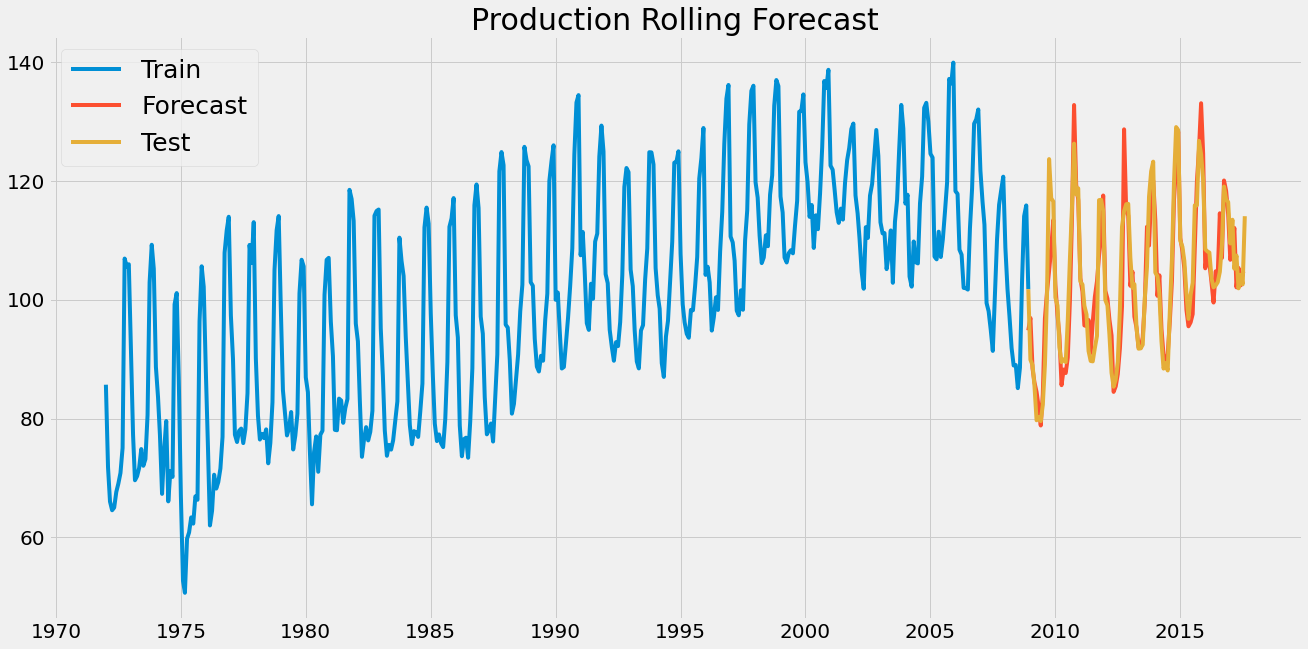

In [48]:
''' plotting production '''

plt.figure(figsize=(20, 10))
plt.title('Production Rolling Forecast', fontsize=30)
plt.plot(X_train, label='Train')
plt.plot(eva['pred'], label='Forecast')
plt.plot(X_test, label='Test')

print(f'Mean Squared Error: {eva["mse"]}')
print("-" * 100)
print()

print(f'Root Mean Squared Error: {eva["rmse"]}')
print("-" * 100)
print()

print(f'Mean Absolute Error: {eva["mae"]}')
print("-" * 100)
print()

plt.legend(['Train', 'Forecast', 'Test'], fontsize=25)
plt.show()